In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

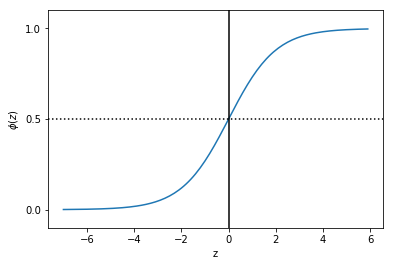

In [3]:
z = np.arange(-7,6,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()